# **Import and Analysis the values**

#### Imoport values

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#### Read the values

In [3]:
df = pd.read_csv("Students_Exam_Scores.csv")
print(df.head(5))

   Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0           0  female         NaN   bachelor's degree      standard     none   
1           1  female     group C        some college      standard      NaN   
2           2  female     group B     master's degree      standard     none   
3           3    male     group A  associate's degree  free/reduced     none   
4           4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  W

#### Describe

In [4]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


#### Information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


#### Find null values

In [6]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

# Data Cleaning

#### Drop Unnamed Column

In [7]:
df = df.drop("Unnamed: 0", axis=1)
print(df.head(5))


   Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0  female         NaN   bachelor's degree      standard     none   
1  female     group C        some college      standard      NaN   
2  female     group B     master's degree      standard     none   
3    male     group A  associate's degree  free/reduced     none   
4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  WritingScore  
0            < 5         71            71            74  


#### Change Weekly Study Hour Column

In [8]:
df["WklyStudyHours"] = df["WklyStudyHours"].str.replace("05-Oct","05-10")
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


# Data Analysis

#### Gender Distribution

C:\Users\Anon Hossain\AppData\Local\Temp\ipykernel_18288\3238566109.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Gender', palette=palette)


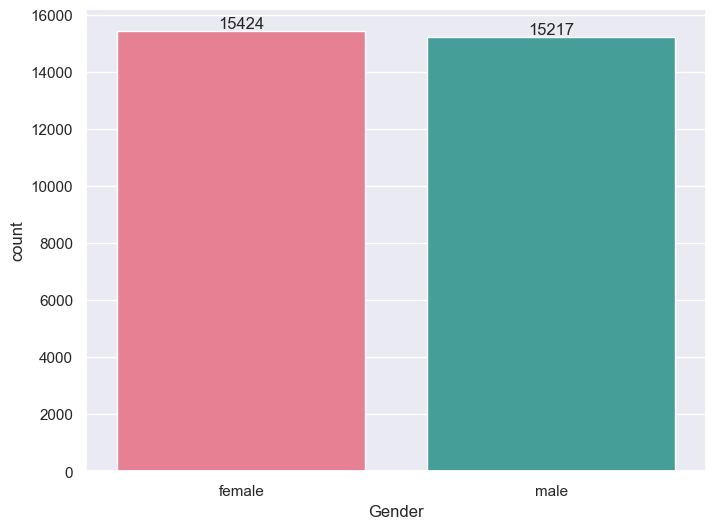

In [16]:
num_states = len(df['Gender'].unique())  # Get the number of unique gender categories in your DataFrame
palette = sns.color_palette("husl", num_states)  # Generate a palette with different hues for each category

# Create the countplot with the specified palette
plt.figure(figsize=(8,6))  # Adjust the figure size as needed
ax = sns.countplot(data=df, x='Gender', palette=palette)
sns.set(rc={'figure.figsize':(10,5)})
for bars in ax.containers:
    ax.bar_label(bars)

plt.show()


#### Impact of parents education on their children

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


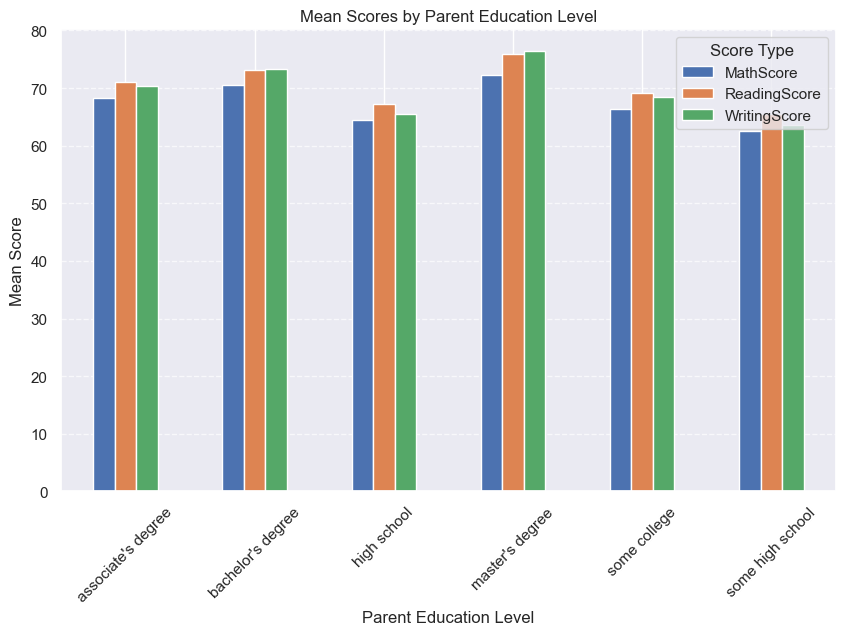

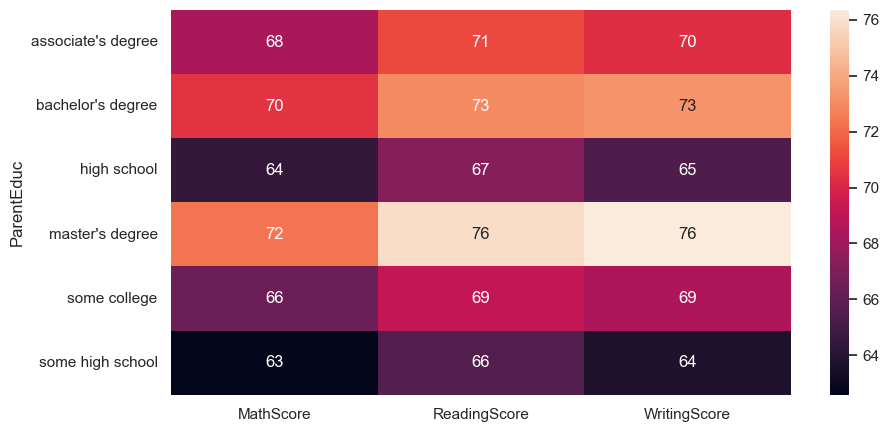

In [24]:
gb= df.groupby("ParentEduc").agg({ "MathScore":'mean', "ReadingScore": 'mean', "WritingScore" : 'mean' })
print(gb)

gb.plot(kind='bar', figsize=(10, 6))
plt.title('Mean Scores by Parent Education Level')
plt.xlabel('Parent Education Level')
plt.ylabel('Mean Score')
plt.xticks(rotation=45)
plt.legend(title='Score Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

sns.heatmap(gb,annot =True )
plt.show()

***Form the above graph we can say that education of parents plays an important role.***

#### Education impact based on Parent's Maretial status

                     MathScore  ReadingScore  WritingScore
ParentMaritalStatus                                       
divorced             66.691197     69.655011     68.799146
married              66.657326     69.389575     68.420981
single               66.165704     69.157250     68.174440
widowed              67.368866     69.651438     68.563452


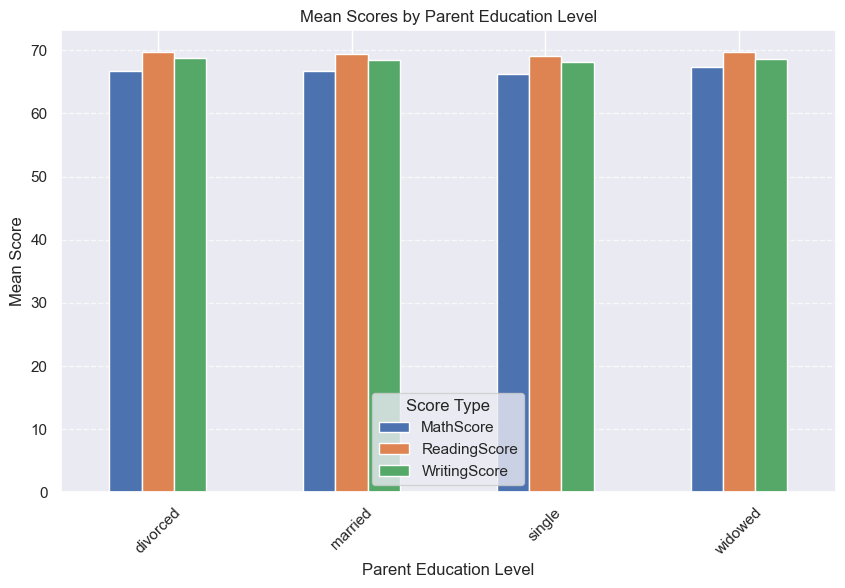

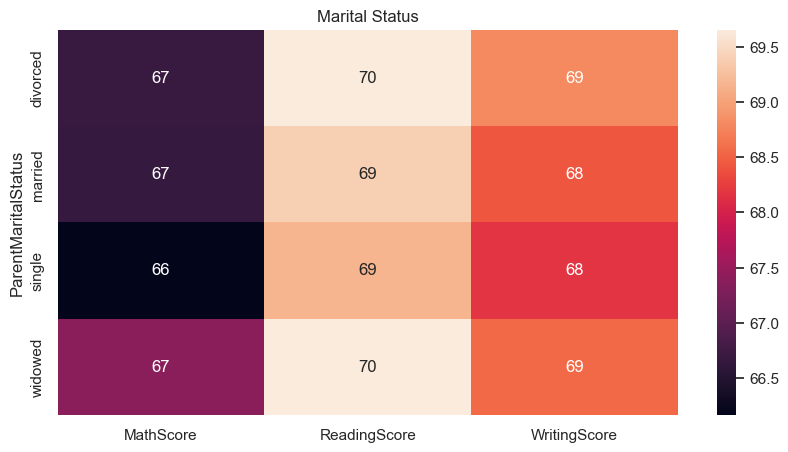

In [27]:
gb= df.groupby("ParentMaritalStatus").agg({ "MathScore":'mean', "ReadingScore": 'mean', "WritingScore" : 'mean' })
print(gb)

gb.plot(kind='bar', figsize=(10, 6))
plt.title('Mean Scores by Parent Education Level')
plt.xlabel('Parent Education Level')
plt.ylabel('Mean Score')
plt.xticks(rotation=45)
plt.legend(title='Score Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

sns.heatmap(gb,annot =True )
plt.title("Marital Status")
plt.show()

***Thus we can Say that marital status doesnot play a major fact***

#### Education status based on Ethnic Group

In [31]:
print(df["EthnicGroup"].unique())

[nan 'group C' 'group B' 'group A' 'group D' 'group E']


([<matplotlib.patches.Wedge at 0x2491ded5100>,
 [Text(1.0679343162184989, 0.26365943230411354, 'Group A (2219)'),
  Text(0.479656756487504, 0.989913832591447, 'Group B (5826)'),
  Text(-1.0208489310562472, 0.40971631644507106, 'Group C (9212)'),
  Text(-0.14172979830625182, -1.09083118046381, 'Group D (7503)'),
  Text(0.9948566425203025, -0.4693189329584214, 'Group E (4041)')],
 [Text(0.582509627028272, 0.14381423580224373, '7.70%'),
  Text(0.26163095808409303, 0.5399529995953347, '20.23%'),
  Text(-0.5568266896670439, 0.2234816271518569, '31.98%'),
  Text(-0.07730716271250097, -0.5949988257075327, '26.05%'),
  Text(0.5426490777383467, -0.255992145250048, '14.03%')])

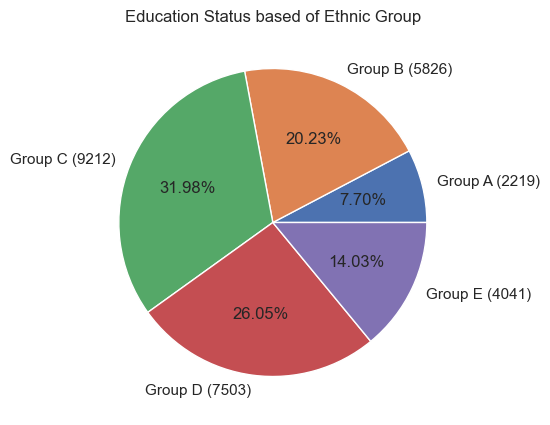

In [50]:
groupA = df.loc[df['EthnicGroup'] == 'group A']
groupB = df.loc[df['EthnicGroup'] == 'group B']
groupC = df.loc[df['EthnicGroup'] == 'group C']
groupD = df.loc[df['EthnicGroup'] == 'group D']
groupE = df.loc[df['EthnicGroup'] == 'group E']

# Calculate the summation of each sector
sum_groupA = groupA.count()
sum_groupB = groupB.count()
sum_groupC = groupC.count()
sum_groupD = groupD.count()
sum_groupE = groupE.count()

# print(groupA)
# print("In Short \n")
# print(sum_groupA)
# print("\n\nFor Group B")
# print(groupB)
# print("In Short \n")
# print(sum_groupB)
# print("\n\nFor Group C")
# print(groupC)
# print("In Short \n")
# print(sum_groupC)
# print("\n\nFor Group D")
# print(groupD)
# print("In Short \n")
# print(sum_groupD)
# print("\n\nFor Group E")
# print(groupD)
# print("In Short \n")
# print(sum_groupE)

title = "Education Status based of Ethnic Group"
labels = [f"Group A ({sum_groupA['EthnicGroup']})", 
          f"Group B ({sum_groupB['EthnicGroup']})", 
          f"Group C ({sum_groupC['EthnicGroup']})", 
          f"Group D ({sum_groupD['EthnicGroup']})", 
          f"Group E ({sum_groupE['EthnicGroup']})"]

group_list = [sum_groupA["EthnicGroup"], 
              sum_groupB["EthnicGroup"], 
              sum_groupC["EthnicGroup"], 
              sum_groupD["EthnicGroup"], 
              sum_groupE["EthnicGroup"]]

plt.title(title)
plt.pie(mlist, labels = labels,autopct = "%1.2f%%")

***Thus we can say that Group C has Most education rate***

#### check the values

[Text(0, 0, '9212'),
 Text(0, 0, '5826'),
 Text(0, 0, '2219'),
 Text(0, 0, '7503'),
 Text(0, 0, '4041')]

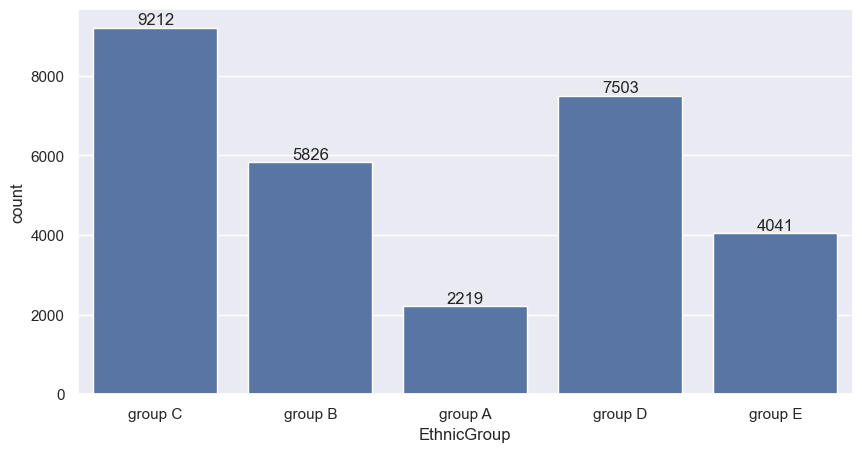

In [49]:
ax = sns.countplot(data = df, x = 'EthnicGroup')
ax.bar_label(ax.containers[0])